In [102]:
import pandas as pd

In [103]:
PATH = './datasets/openfoodfacts_part1.csv'

In [104]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import mpld3
# mpld3.enable_notebook()

In [105]:
dataset = pd.read_csv(PATH, sep = '\t') 

C:\Users\celie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (9,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Read all CSVs

In [290]:
li = []
for _ in range(1,16):
    path_dataset = f'./datasets/openfoodfacts_part{_}.csv'
    dataset = pd.read_csv(PATH, sep = '\t')
    li.append(dataset)
    
dataset = pd.concat(li, axis=0, ignore_index=True)

C:\Users\celie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (9,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Get upper category

In [291]:
dataset["big_category"] = dataset["categories_tags"].apply(lambda x : x.split(",")[0])

In [292]:
len(dataset["big_category"].unique())

130

## Keep only interesting columns

In [293]:
dataset = dataset[[
"product_name",
"categories_tags",
"nutriscore_score",
"nutriscore_grade",
"energy-kj_100g",
"energy_100g",
"energy-kcal_100g",
"energy-from-fat_100g",
"fat_100g",
"saturated-fat_100g",
"-butyric-acid_100g",
"-caproic-acid_100g",
"-caprylic-acid_100g",
"-capric-acid_100g",
"-lauric-acid_100g",
"-myristic-acid_100g",
"-palmitic-acid_100g",
"-stearic-acid_100g",
"-arachidic-acid_100g",
"-behenic-acid_100g",
"-lignoceric-acid_100g",
"-cerotic-acid_100g",
"-montanic-acid_100g",
"-melissic-acid_100g",
"monounsaturated-fat_100g",
"polyunsaturated-fat_100g",
"omega-3-fat_100g",
"-alpha-linolenic-acid_100g",
"-eicosapentaenoic-acid_100g",
"-docosahexaenoic-acid_100g",
"omega-6-fat_100g",
"-linoleic-acid_100g",
"-arachidonic-acid_100g",
"-gamma-linolenic-acid_100g",
"-dihomo-gamma-linolenic-acid_100g",
"omega-9-fat_100g",
"-oleic-acid_100g",
"-elaidic-acid_100g",
"-gondoic-acid_100g",
"-mead-acid_100g",
"-erucic-acid_100g",
"-nervonic-acid_100g",
"trans-fat_100g",
"cholesterol_100g",
"carbohydrates_100g",
"sugars_100g",
"-sucrose_100g",
"-glucose_100g",
"-fructose_100g",
"-lactose_100g",
"-maltose_100g",
"-maltodextrins_100g",
"starch_100g",
"polyols_100g",
"fiber_100g",
"-soluble-fiber_100g",
"-insoluble-fiber_100g",
"proteins_100g",
"casein_100g",
"serum-proteins_100g",
"nucleotides_100g",
"salt_100g",
"sodium_100g",
"alcohol_100g",
"vitamin-a_100g",
"beta-carotene_100g",
"vitamin-d_100g",
"vitamin-e_100g",
"vitamin-k_100g",
"vitamin-c_100g",
"vitamin-b1_100g",
"vitamin-b2_100g",
"vitamin-pp_100g",
"vitamin-b6_100g",
"vitamin-b9_100g",
"folates_100g",
"vitamin-b12_100g",
"biotin_100g",
"pantothenic-acid_100g",
"silica_100g",
"bicarbonate_100g",
"potassium_100g",
"chloride_100g",
"calcium_100g",
"phosphorus_100g",
"iron_100g",
"magnesium_100g",
"zinc_100g",
"copper_100g",
"manganese_100g",
"fluoride_100g",
"selenium_100g",
"chromium_100g",
"molybdenum_100g",
"iodine_100g",
"caffeine_100g",
"taurine_100g",
"ph_100g",
"fruits-vegetables-nuts_100g",
"fruits-vegetables-nuts-dried_100g",
"fruits-vegetables-nuts-estimate_100g",
"collagen-meat-protein-ratio_100g",
"cocoa_100g",
"chlorophyl_100g",
"carbon-footprint_100g",
"carbon-footprint-from-meat-or-fish_100g",
"nutrition-score-fr_100g",
"nutrition-score-uk_100g",
"glycemic-index_100g",
"water-hardness_100g",
"choline_100g",
"phylloquinone_100g",
"beta-glucan_100g",
"inositol_100g",
"carnitine_100g",
"ingredients_en",
    "big_category"
]]

## Retirer les lignes des catégories qui ont moins de 20% de valeurs non renseignés

In [294]:
i = 0
for _ in dataset.columns:
    if dataset[_].isna().sum() < len(dataset)*20/100:
        print(f'{_} : {dataset[_].isna().sum()}')
        i+=1
        dataset = dataset.dropna(subset=[_])
print(i)

product_name : 0
categories_tags : 0
nutriscore_score : 97350
nutriscore_grade : 0
energy_100g : 15
energy-kcal_100g : 1890
fat_100g : 0
saturated-fat_100g : 105
trans-fat_100g : 26865
cholesterol_100g : 2325
carbohydrates_100g : 0
sugars_100g : 0
fiber_100g : 3390
proteins_100g : 0
salt_100g : 0
sodium_100g : 0
vitamin-c_100g : 75855
calcium_100g : 915
iron_100g : 300
nutrition-score-fr_100g : 0
ingredients_en : 0
big_category : 0
22


In [179]:
dataset.shape

(303720, 116)

## Retirer les connards

In [295]:
dataset =  dataset[dataset["energy-kcal_100g"] < 15000] 

## Define X

In [257]:
df = dataset[[
"energy-kcal_100g",
"fat_100g",
"saturated-fat_100g",
"trans-fat_100g",
"cholesterol_100g",
"carbohydrates_100g",
"sugars_100g",
"fiber_100g",
"proteins_100g",
"salt_100g",
"sodium_100g",
"vitamin-c_100g",
"calcium_100g",
"iron_100g",
"nutriscore_score"
]]

In [259]:
df = dataset[[
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "sugars_100g",
    "fiber_100g",
    "nutriscore_score"
]]

In [319]:
df = dataset[[
    "fat_100g",
#     "saturated-fat_100g",
#     "sugars_100g",
#     "fiber_100g"
    "nutriscore_score"
]]

## Predict big category

In [223]:
model=KMeans(n_clusters=len(dataset["big_category"].unique()))
model.fit(df)

KMeans(n_clusters=41)

In [224]:
print(model.labels_)

[10 27  8 ...  5 27 27]


In [225]:
import random
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(dataset["big_category"].unique()))])

In [226]:
cat = dataset["big_category"].unique().tolist()
dataset["big_category_number"] = dataset["big_category"].apply(lambda x : cat.index(x) )

<ipython-input-226-abe46506b2d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["big_category_number"] = dataset["big_category"].apply(lambda x : cat.index(x) )


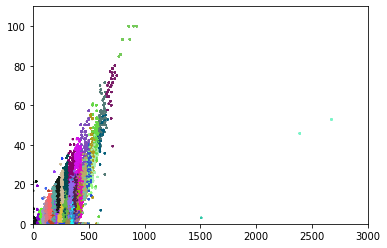

In [227]:
plt.ylim(top=110)
plt.xlim(right=3000)
plt.scatter(df["energy-kcal_100g"], df["fat_100g"], s=1, c=cmap[model.labels_])

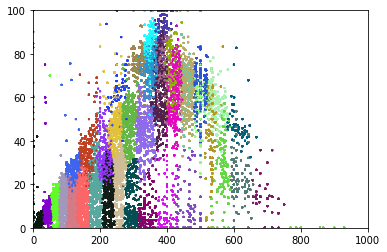

In [228]:
plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(df["energy-kcal_100g"], df["carbohydrates_100g"], s=1, c=cmap[model.labels_])

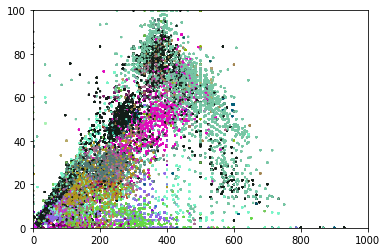

In [229]:
plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(df["energy-kcal_100g"], df["carbohydrates_100g"], s=1, c=cmap[dataset["big_category_number"]])

## Nutrigrade

    "fat_100g",
    "saturated-fat_100g",
    "sugars_100g",
    "fiber_100g",
    "nutriscore_score"

In [303]:
cat = dataset["nutriscore_grade"].unique().tolist()
dataset["nutriscore_grade_number"] = dataset["nutriscore_grade"].apply(lambda x : cat.index(x) )

In [320]:
model=KMeans(n_clusters=len(dataset["nutriscore_grade"].unique()))
model.fit(df)

KMeans(n_clusters=5)

In [321]:
cmap = np.array([ np.random.choice(range(256), size=3)/256 for j in range(len(dataset["nutriscore_grade"].unique()))])

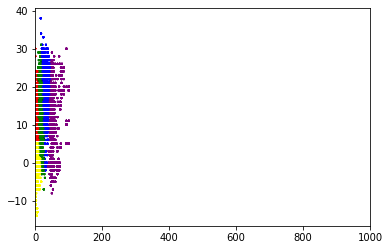

In [325]:
cmap = np.array(["green", "yellow", "blue", "purple", "red"])
# plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(dataset["fat_100g"], dataset["nutriscore_score"], s=1, c=cmap[model.labels_])

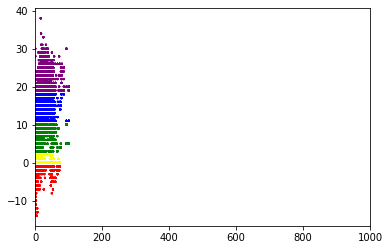

In [326]:
# plt.ylim(top=100)
plt.xlim(right=1000)
plt.scatter(dataset["fat_100g"], dataset["nutriscore_score"], s=1, c=cmap[dataset["nutriscore_grade_number"]])

## Correlation

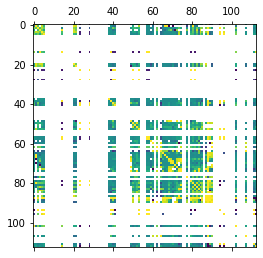

In [236]:
plt.matshow(dataset.corr())
plt.show()

In [265]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,nutriscore_score
energy-kcal_100g,1.000000,0.764189,0.544473,0.348160,0.291192,0.620743
fat_100g,0.764189,1.000000,0.709659,0.000138,0.155377,0.513451
saturated-fat_100g,0.544473,0.709659,1.000000,0.154926,-0.034110,0.600634
sugars_100g,0.348160,0.000138,0.154926,1.000000,-0.037296,0.499443
fiber_100g,0.291192,0.155377,-0.034110,-0.037296,1.000000,-0.179251
nutriscore_score,0.620743,0.513451,0.600634,0.499443,-0.179251,1.000000
